<a href="https://colab.research.google.com/github/Vjfrib/ED/blob/main/Projeto_Final_ED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminário sobre Grafos de Conhecimento - ED
*Prof. Dr. Cleyton Mário*
<br>
*Disc. Vinícius Ribeiro*

In [1]:
!pip install spacy networkx matplotlib owlready2 pydot pdfplumber torch transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 45.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manyl

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

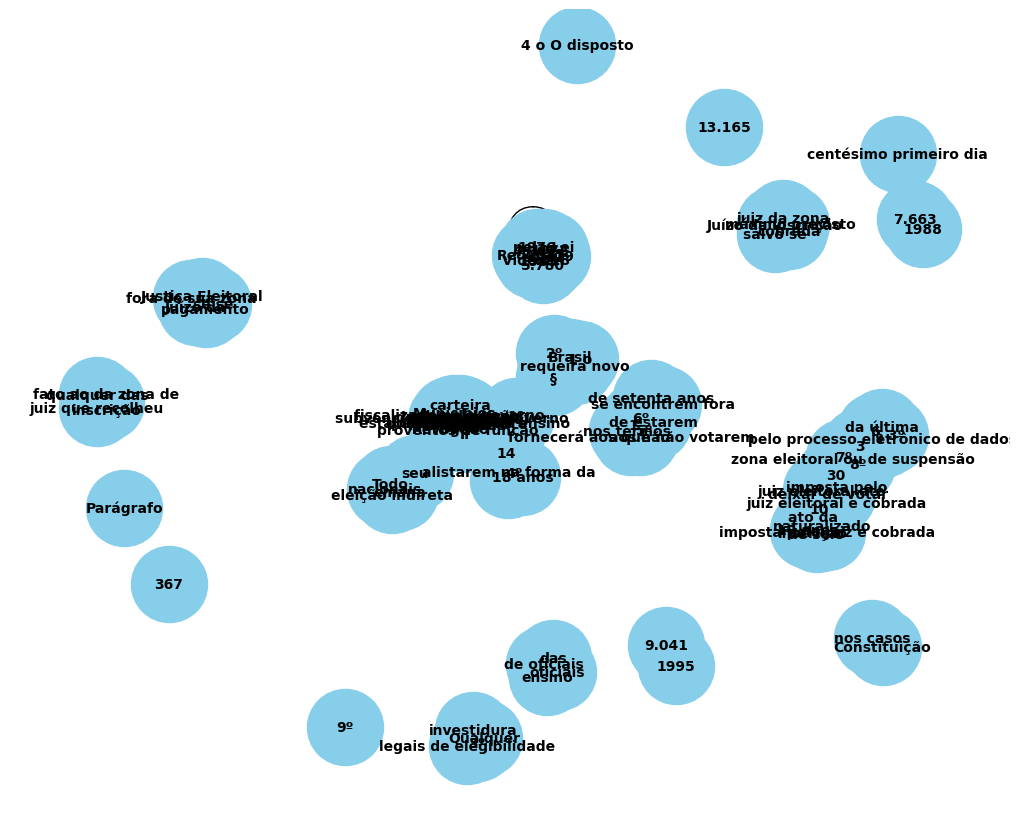

TypeError: __class__ assignment: 'Eleitor' object layout differs from 'ThingClass'

In [2]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from owlready2 import *
import pydot
from IPython.display import Image, display
import pdfplumber
import torch
from transformers import BertTokenizer, BertModel

# Função para ler o texto do PDF usando pdfplumber
def read_pdf(file_path):
    text = ""
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text()
    return text

# Função para processar o texto com BERT
def process_text_with_bert(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    return outputs

# Carregar o tokenizer e o modelo BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Ler o texto do PDF
pdf_path = "Art2ao11.pdf"
corpus = read_pdf(pdf_path)

# Processar o texto com BERT
outputs = process_text_with_bert(corpus)

# Carregar o modelo de linguagem do spaCy
nlp = spacy.load('en_core_web_sm')

# Pré-processamento do texto
docs = [nlp(corpus)]

# Extração de entidades e relações
entities = set()
relations = []

for doc in docs:
    for ent in doc.ents:
        entities.add((ent.text, ent.label_))
    for sent in doc.sents:
        for ent1 in sent.ents:
            for ent2 in sent.ents:
                if ent1 != ent2:
                    relations.append((ent1.text, ent2.text))

# Construção do grafo de conhecimento
G = nx.Graph()

# Adicionar nós e arestas ao grafo
for entity in entities:
    G.add_node(entity[0], label=entity[1])

for rel in relations:
    G.add_edge(rel[0], rel[1])

# Visualizar o grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
plt.show()

# Desenvolvimento de uma ontologia
# Criação de uma nova ontologia
onto = get_ontology("http://example.org/election.owl")

with onto:
    # Definindo classes baseadas no texto
    class Pessoa(Thing):
        pass
    class Eleitor(Pessoa):
        pass
    class Candidato(Pessoa):
        pass
    class Eleicao(Thing):
        pass
    class LeiEleitoral(Thing):
        pass
    class possuiEleitor(Pessoa >> Eleitor):
        pass
    class possuiCandidato(Pessoa >> Candidato):
        pass
    class regidaPor(Eleicao >> LeiEleitoral):
        pass
    class elegivelPara(Pessoa >> Eleicao):
        pass
    class desqualificadoDe(Pessoa >> Eleicao):
        pass
    class multadoPor(Pessoa >> LeiEleitoral):
        pass

# Adicionar instâncias à ontologia
cidadão = Pessoa("Cidadão")
eleitor = Eleitor("Eleitor")
candidato = Candidato("Candidato")
eleicao = Eleicao("Eleição")
lei = LeiEleitoral("LeiEleitoral")

# Adicionar relações
cidadão.possuiEleitor.append(eleitor)
cidadão.possuiCandidato.append(candidato)
eleicao.regidaPor.append(lei)
cidadão.elegivelPara.append(eleicao)
cidadão.desqualificadoDe.append(eleicao)
cidadão.multadoPor.append(lei)

# Salvar a ontologia
onto.save(file="ontologia_eleitoral.owl", format="rdfxml")

# Plotagem da Ontologia
def plot_ontology(onto):
    dot = pydot.Dot(graph_type='digraph')

    for cls in onto.classes():
        dot.add_node(pydot.Node(cls.name))

    for prop in onto.properties():
        for domain in prop.domain:
            for range in prop.range:
                dot.add_edge(pydot.Edge(domain.name, range.name, label=prop.name))

    dot.write_png('ontologia.png')

plot_ontology(onto)

print("Ontologia:")
# Exibir a ontologia
display(Image('ontologia.png'))
